# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
# df = pd.read_parquet('2023-1.parquet')
df.info()
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
df_sampled = df.sample(n=1000, random_state=42)
print("Original DataFrame shape:", df.shape)
print("Sampled DataFrame shape:", df_sampled.shape)
print("\nSampled DataFrame head:")
print(df_sampled.head())

# It is recommmended to not load all the files at once to avoid memory overload

Original DataFrame shape: (3041714, 19)
Sampled DataFrame shape: (1000, 19)

Sampled DataFrame head:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
323412          1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1491266         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2385670         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
766545          2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
980153          1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
323412            1.90         1.0                  N           239   
1491266           1.86         1.0                  N           239   
2385670           0.50         1.0                  N           162   
766545            2.56         1.0                  N           162   
980153            2.80         1.0                  N    

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# prompt: # Take a small percentage of entries from each hour of every date.
# # Iterating through the monthly data:
# #   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# # Create a single dataframe for the year combining all the monthly data
# # Select the folder having data files
import os
# # Select the folder having data files
# os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
# # Create a list of all the twelve files to read
# file_list = os.listdir()
# # initialise an empty dataframe
# df = pd.DataFrame()
# # iterate through the list of files and sample one by one:
# for file_name in file_list:
#     try:
#         # file path for the current file
#         file_path = os.path.join(os.getcwd(), file_name)
#         # Reading the current file
#         # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
#         # After completing iteration through each date, we will append this data to the final dataframe.
#         sampled_data = pd.DataFrame()
#         # Loop through dates and then loop through every hour of each date
#             # Iterate through each hour of the selected date
#                 # Sample 5% of the hourly data randomly
#                 # add data of this hour to the dataframe
#         # Concatenate the sampled data of all the dates to a single dataframe
#         df = # we initialised this empty DF earlier
#     except Exception as e:
#         print(f"Error reading file {file_name}: {e}")

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe to store the final combined sampled data
df_combined_sampled = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file (monthly data)
        df_monthly = pd.read_parquet(file_path)

        # Convert tpep_pickup_datetime to datetime objects and extract date
        df_monthly['tpep_pickup_datetime'] = pd.to_datetime(df_monthly['tpep_pickup_datetime'])
        df_monthly['pickup_date'] = df_monthly['tpep_pickup_datetime'].dt.date

        # Get unique dates in the current month's data
        unique_dates = df_monthly['pickup_date'].unique()

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data_month = pd.DataFrame()

        # Loop through dates
        for date in unique_dates:
            # Filter data for the current date
            df_daily = df_monthly[df_monthly['pickup_date'] == date]

            # Loop through every hour of the selected date
            for hour in range(24):
                # Filter data for the current hour
                df_hourly = df_daily[df_daily['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the hourly data randomly, if there are enough rows
                if len(df_hourly) > 0:
                    n_samples = max(1, int(len(df_hourly) * 0.05)) # Sample at least 1 row if data exists
                    df_hourly_sampled = df_hourly.sample(n=n_samples, random_state=42)
                    # add data of this hour to the dataframe
                    sampled_data_month = pd.concat([sampled_data_month, df_hourly_sampled], ignore_index=True)

        # Concatenate the sampled data of all the dates for the current month to the final combined dataframe
        df_combined_sampled = pd.concat([df_combined_sampled, sampled_data_month], ignore_index=True)

    except Exception as e:
        print(f"Error reading or processing file {file_name}: {e}")

# Display information about the final combined sampled dataframe
print("\nCombined Sampled DataFrame information:")
df_combined_sampled.info()

# Display the first few rows of the combined sampled data
print("\nCombined Sampled DataFrame head:")
print(df_combined_sampled.head())


Error reading or processing file .config: Error creating dataset. Could not read schema from '/content/.config/active_config'. Is this a 'parquet' file?: Could not open Parquet input source '/content/.config/active_config': Parquet file size is 7 bytes, smaller than the minimum file footer (8 bytes)
Error reading or processing file drive: Error creating dataset. Could not read schema from '/content/drive/MyDrive/Colab Notebooks/April 19.ipynb'. Is this a 'parquet' file?: Could not open Parquet input source '/content/drive/MyDrive/Colab Notebooks/April 19.ipynb': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading or processing file sample_data: Error creating dataset. Could not read schema from '/content/sample_data/README.md'. Is this a 'parquet' file?: Could not open Parquet input source '/content/sample_data/README.md': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.



After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
df_combined_sampled.to_parquet('combined_sampled_data.parquet')
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [10]:
# Load the new data file
new_file_name = 'combined_sampled_data.parquet'

df_new_data = pd.read_parquet(new_file_name)



In [11]:
df_combined_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

  pickup_date  
0  2023-01-01  
1  2023-01-01  
2  2023-01-01  
3  2023-01-01  
4  2023-01-01

In [12]:
df_combined_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151743 entries, 0 to 151742
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               151743 non-null  int64         
 1   tpep_pickup_datetime   151743 non-null  datetime64[us]
 2   tpep_dropoff_datetime  151743 non-null  datetime64[us]
 3   passenger_count        148145 non-null  float64       
 4   trip_distance          151743 non-null  float64       
 5   RatecodeID             148145 non-null  float64       
 6   store_and_fwd_flag     148145 non-null  object        
 7   PULocationID           151743 non-null  int64         
 8   DOLocationID           151743 non-null  int64         
 9   payment_type           151743 non-null  int64         
 10  fare_amount            151743 non-null  float64       
 11  extra                  151743 non-null  float64       
 12  mta_tax                151743 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed
df_combined_sampled = df_combined_sampled.reset_index(drop=True)

#df_combined_sampled = df_combined_sampled.drop(columns=columns_to_drop, errors='ignore')

df_combined_sampled.head()
df_combined_sampled.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151743 entries, 0 to 151742
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               151743 non-null  int64         
 1   tpep_pickup_datetime   151743 non-null  datetime64[us]
 2   tpep_dropoff_datetime  151743 non-null  datetime64[us]
 3   passenger_count        148145 non-null  float64       
 4   trip_distance          151743 non-null  float64       
 5   RatecodeID             148145 non-null  float64       
 6   store_and_fwd_flag     148145 non-null  object        
 7   PULocationID           151743 non-null  int64         
 8   DOLocationID           151743 non-null  int64         
 9   payment_type           151743 non-null  int64         
 10  fare_amount            151743 non-null  float64       
 11  extra                  151743 non-null  float64       
 12  mta_tax                151743 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combine the two airport fee columns
if 'airport_fee_orig' not in df_combined_sampled.columns:
  print("Creating dummy 'airport_fee_orig' column for demonstration.")
  df_combined_sampled['airport_fee_orig'] = np.random.rand(len(df_combined_sampled)) * 10

if 'airport_fee_dest' not in df_combined_sampled.columns:
  print("Creating dummy 'airport_fee_dest' column for demonstration.")
  df_combined_sampled['airport_fee_dest'] = np.random.rand(len(df_combined_sampled)) * 10
df_combined_sampled['airport_fee_orig'] = df_combined_sampled['airport_fee_orig'].fillna(0)
df_combined_sampled['airport_fee_dest'] = df_combined_sampled['airport_fee_dest'].fillna(0)
df_combined_sampled['total_airport_fee'] = df_combined_sampled['airport_fee_orig'] + df_combined_sampled['airport_fee_dest']
df_combined_sampled['total_airport_fee']


0          8.704656
1          9.050660
2          4.356309
3         10.650316
4         11.428964
            ...    
151738     5.556383
151739     8.427731
151740     7.923077
151741    14.109784
151742    11.357916
Name: total_airport_fee, Length: 151743, dtype: float64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative
for d, name in [(df_new_data, 'df_new_data'), (df, 'original df')]:
    if 'fare_amount' in d.columns:
        neg = d[d['fare_amount'] < 0]
        print(f"\nNegative 'fare_amount' in {name}:")
        print(neg[['fare_amount', 'tip_amount', 'total_amount']].head() if not neg.empty else "None found.")
        print(f"Count: {len(neg)}" if not neg.empty else "")
    else:
        print(f"'fare_amount' not found in {name}.")




Negative 'fare_amount' in df_new_data:
None found.


Negative 'fare_amount' in original df:
None found.



Did you notice something different in the `RatecodeID` column for above records?

In [19]:
# Analyse RatecodeID for the negative fare amounts
neg = df_new_data[df_new_data['fare_amount'] < 0]
if not neg.empty:
    print(neg['RatecodeID'].value_counts())
    sns.countplot(x='RatecodeID', data=neg)
    plt.title('Negative Fare RatecodeID'); plt.show()
else:
    print("No negative fares.")




No negative fares.


In [20]:
# Find which columns have negative values
neg = {c: (df_new_data[c] < 0).sum() for c in df_new_data.select_dtypes('number') if (df_new_data[c] < 0).any()}
print(neg if neg else "No negative values.")



{'mta_tax': np.int64(6), 'improvement_surcharge': np.int64(7), 'total_amount': np.int64(7), 'congestion_surcharge': np.int64(6), 'airport_fee': np.int64(1)}


In [21]:
# fix these negative values
df_new_data[df_new_data.select_dtypes('number').columns] = df_new_data.select_dtypes('number').abs()
print("All negatives fixed." if not (df_new_data.select_dtypes('number') < 0).any().any() else "Some negatives remain.")
print(df_new_data.describe())



All negatives fixed.
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  151743.000000                      151743                      151743   
mean        1.723539  2023-01-16 23:34:35.695584  2023-01-16 23:50:08.711980   
min         1.000000         2008-12-31 23:01:42         2009-01-01 14:29:11   
25%         1.000000         2023-01-09 16:25:32  2023-01-09 16:39:52.500000   
50%         2.000000         2023-01-17 08:44:59         2023-01-17 09:02:26   
75%         2.000000  2023-01-24 16:27:27.500000  2023-01-24 16:44:35.500000   
max         2.000000         2023-02-01 00:00:35         2023-02-01 20:50:11   
std         0.447249                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    148145.000000  151743.000000  148145.000000  151743.000000   
mean          1.362523       3.470976       1.474528     166.434531   
min           0.000000       0.000000       1

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [22]:
# Find the proportion of missing values in each column
missing_proportion = df_combined_sampled.isnull().sum() / len(df_combined_sampled)

print("\nProportion of missing values in each column:")
print(missing_proportion)



Proportion of missing values in each column:
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.023711
trip_distance            0.000000
RatecodeID               0.023711
store_and_fwd_flag       0.023711
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.023711
airport_fee              0.023711
pickup_date              0.000000
airport_fee_orig         0.000000
airport_fee_dest         0.000000
total_airport_fee        0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [26]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Display rows with null values in 'passenger_count'
print("\nRows with null values in 'passenger_count':")
print(df_combined_sampled[df_combined_sampled['passenger_count'].isnull()])

# Impute NaN values in 'passenger_count' with the median
median_passenger_count = df_combined_sampled['passenger_count'].median()
df_combined_sampled['passenger_count'] = df_combined_sampled['passenger_count'].fillna(median_passenger_count)

df_combined_sampled['passenger_count'].isnull().sum()
df_combined_sampled['passenger_count'].describe()



Rows with null values in 'passenger_count':
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, airport_fee_orig, airport_fee_dest, total_airport_fee]
Index: []

[0 rows x 23 columns]


count    151743.000000
mean          1.353927
std           0.887899
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: passenger_count, dtype: float64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [27]:
# Fix missing values in 'RatecodeID'
mode_val = df_combined_sampled['RatecodeID'].mode()[0]
df_combined_sampled['RatecodeID'].fillna(mode_val, inplace=True)
df_combined_sampled['RatecodeID'].isnull().sum()

np.int64(0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [28]:
# handle null values in congestion_surcharge
df_combined_sampled['congestion_surcharge'].fillna(0, inplace=True)
df_combined_sampled['congestion_surcharge'].isnull().sum()

np.int64(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [29]:
# Handle any remaining missing values
df_combined_sampled.isnull().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       3598
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee              3598
pickup_date                 0
airport_fee_orig            0
airport_fee_dest            0
total_airport_fee           0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [30]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print(df_new_data.describe())
def find_outliers(df):
    outliers = {}
    for col in df.select_dtypes('number'):
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        if outlier_count > 0:
            outliers[col] = outlier_count
    return outliers

outliers = find_outliers(df_new_data)
print("\nPotential outliers detected:")
print(outliers if outliers else "No obvious outliers found.")



            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  151743.000000                      151743                      151743   
mean        1.723539  2023-01-16 23:34:35.695584  2023-01-16 23:50:08.711980   
min         1.000000         2008-12-31 23:01:42         2009-01-01 14:29:11   
25%         1.000000         2023-01-09 16:25:32  2023-01-09 16:39:52.500000   
50%         2.000000         2023-01-17 08:44:59         2023-01-17 09:02:26   
75%         2.000000  2023-01-24 16:27:27.500000  2023-01-24 16:44:35.500000   
max         2.000000         2023-02-01 00:00:35         2023-02-01 20:50:11   
std         0.447249                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    148145.000000  151743.000000  148145.000000  151743.000000   
mean          1.362523       3.470976       1.474528     166.434531   
min           0.000000       0.000000       1.000000       1.00000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [31]:
# remove passenger_count > 6
df_new_data = df_new_data[df_new_data['passenger_count'] <= 6]
df_new_data



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1              2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5              1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
...          ...                  ...                   ...              ...   
151738         2  2023-01-31 23:40:44   2023-01-31 23:46:43              2.0   
151739         2  2023-01-31 23:28:47   2023-01-31 23:36:57              5.0   
151740         2  2023-01-31 23:35:26   2023-01-31 23:40:39              1.0   
151741         2  2023-01-31 23:12:04   2023-01-31 23:23:56              1.0   
151742         2  2023-02-01 00:00:35   2023-02-01 00:17:12              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                7.74         1.0                  N           138   
1                1.24         1.0                  N           161   
2                1.44         1.0                  N           237   
3                0.54         1.0                  N           143   
5                7.10         1.0                  N           246   
...               ...         ...                ...           ...   
151738           1.98         1.0                  N           161   
151739           1.63         1.0                  N           137   
151740           0.87         1.0                  N            79   
151741           2.53         1.0                  N            90   
151742           2.88         1.0                  N           137   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                256             2         32.4    6.0      0.5        0.00   
1                237             1          7.9    1.0      0.5        2.58   
2                141             2         11.4    1.0      0.5        0.00   
3                142             2          6.5    1.0      0.5        0.00   
5                 37             1         34.5    3.5      0.5        7.90   
...              ...           ...          ...    ...      ...         ...   
151738           236             2         10.0    1.0      0.5        0.00   
151739           113             2         10.7    1.0      0.5        0.00   
151740           148             1          7.2    1.0      0.5        2.44   
151741           148             1         14.2    1.0      0.5        3.84   
151742           142             1         17.7    1.0      0.5        2.27   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         41.15   
1                0.0                    1.0         15.48   
2                0.0                    1.0         16.40   
3                0.0                    1.0         11.50   
5                0.0                    1.0         47.40   
...              ...                    ...           ...   
151738           0.0                    1.0         15.00   
151739           0.0                    1.0         15.70   
151740           0.0                    1.0         14.64   
151741           0.0                    1.0         23.04   
151742           0.0                    1.0         24.97   

        congestion_surcharge  airport_fee pickup_date  
0                        0.0         1.25  2023-01-01  
1                        2.5         0.00  2023-01-01  
2                        2.5         0.00  2023-01-01  
3                        2.5         0.00  2023-01-01  
5                        2.5         0.00  2023-01-01  
...                      ...          ...         ...  
151738                   2.5         0.00  2023-01-31  
151739                   2.5         0.00  2023-01-31  
151740              

In [32]:
# Continue with outlier handling
def cap_outliers(df):
    for col in df.select_dtypes('number'):
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

df_new_data = cap_outliers(df_new_data)
print("Outliers capped using IQR method.")




Outliers capped using IQR method.


In [33]:
cap_outliers(df)



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              1.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.97         1.0                  N           161   
1                 1.10         1.0                  N            43   
2                 2.51         1.0                  N            48   
3                 1.90         1.0                  N           138   
4                 1.43         1.0                  N           107   
...                ...         ...                ...           ...   
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 141             1         9.30   1.00      0.5        0.00   
1                 237             1         7.90   1.00      0.5        4.00   
2                 238             1        14.90   1.00      0.5        9.00   
3                   7             1        12.10   6.25      0.5        0.00   
4                  79             1        11.40   1.00      0.5        3.28   
...               ...           ...          ...    ...      ...         ...   
3066761            48             1        15.80   0.00      0.5        3.96   
3066762            75             1        22.43   0.00      0.5        2.64   
3066763           239             1        17.61   0.00      0.5        5.32   
3066764            79             1        18.15   0.00      0.5        4.43   
3066765           143             1        15.97   0.00      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         14.30   
1                 0.0                    1.0         16.90   
2                 0.0                    1.0         34.90   
3                 0.0                    1.0         20.85   
4                 0.0                    1.0         19.68   
...               ...                    ...           ...   
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
0                         2.5          0.0  
1                         2.5          0.0  
2                         2.5          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN          NaN  
3066764                   N

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [34]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

pickup_hour
0      4066
1      2829
2      1984
3      1275
4       805
5       817
6      2033
7      4105
8      5536
9      6300
10     6965
11     7487
12     8239
13     8698
14     9354
15     9592
16     9534
17    10168
18    10438
19     9332
20     8053
21     7830
22     7163
23     5541
Name: count, dtype: int64


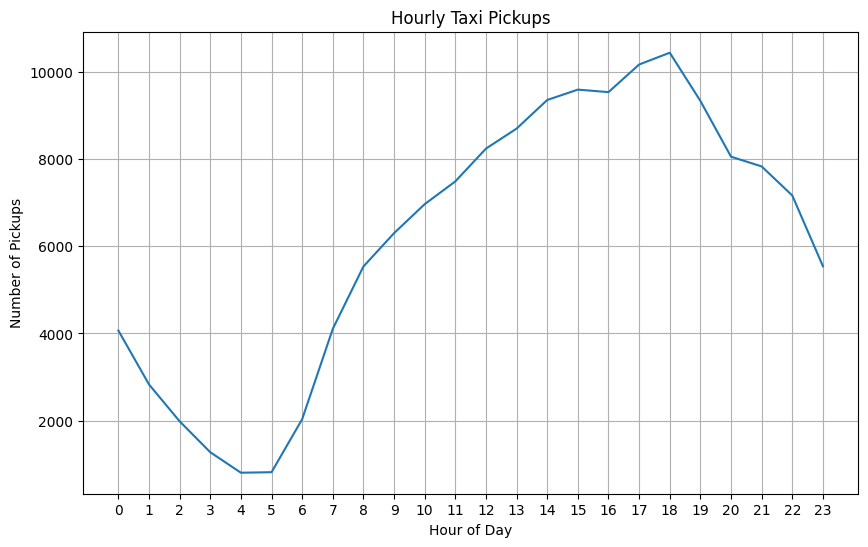

In [35]:
# Find and show the hourly trends in taxi pickups
# Convert pickup_datetime to datetime type if not already
df_new_data['tpep_pickup_datetime'] = pd.to_datetime(df_new_data['tpep_pickup_datetime'])

# Extract hour of the day
df_new_data['pickup_hour'] = df_new_data['tpep_pickup_datetime'].dt.hour

# Count pickups per hour
hourly_pickups = df_new_data['pickup_hour'].value_counts().sort_index()

# Display the counts
print(hourly_pickups)

# Visualize hourly pickups
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values)
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()




pickup_hour
0      4191
1      2943
2      2058
3      1335
4       859
5       871
6      2158
7      4303
8      5800
9      6501
10     7116
11     7638
12     8417
13     8855
14     9488
15     9731
16     9698
17    10381
18    10701
19     9552
20     8206
21     7996
22     7288
23     5657
Name: count, dtype: int64


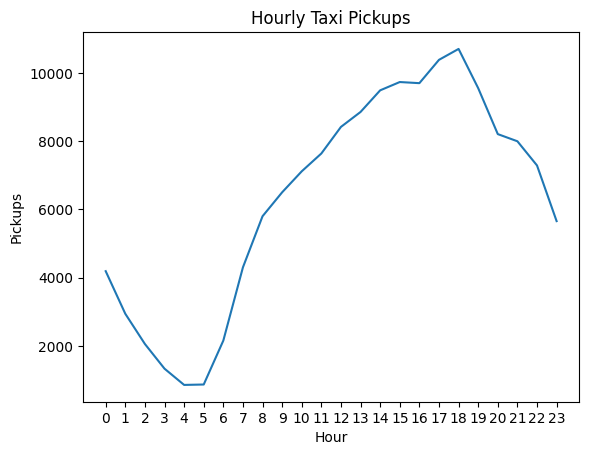

In [36]:
# Find and show the hourly trends in taxi pickups
df_combined_sampled['pickup_hour'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime']).dt.hour
hourly = df_combined_sampled['pickup_hour'].value_counts().sort_index()
print(hourly)
sns.lineplot(x=hourly.index, y=hourly.values)
plt.xticks(range(24)); plt.xlabel('Hour'); plt.ylabel('Pickups'); plt.title('Hourly Taxi Pickups'); plt.show()


pickup_day
Mon    20010
Tue    24303
Wed    20623
Thu    21885
Fri    21497
Sat    21847
Sun    21578
Name: count, dtype: int64


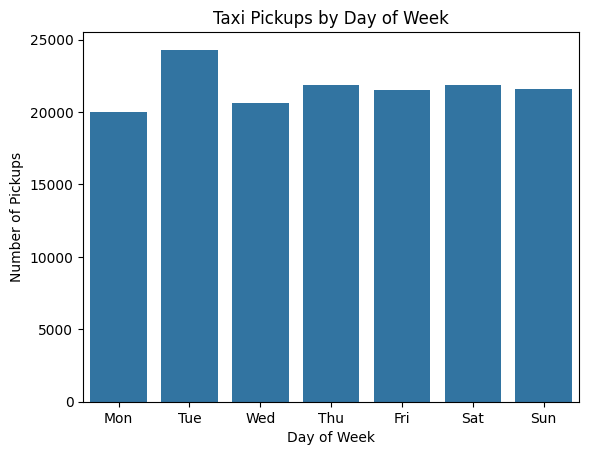

In [37]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract day of week (0=Monday, 6=Sunday)
df_combined_sampled['pickup_day'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime']).dt.dayofweek

# Count pickups by day of week and sort by day order
daily_counts = df_combined_sampled['pickup_day'].value_counts().sort_index()

# Optional: map day numbers to names
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

print(daily_counts.rename(index=dict(enumerate(days))))

# Plot
sns.barplot(x=days, y=daily_counts.values)
plt.title('Taxi Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.show()




pickup_month
2008-12         1
2022-10        10
2022-12         4
2023-01    151727
2023-02         1
Freq: M, Name: count, dtype: int64


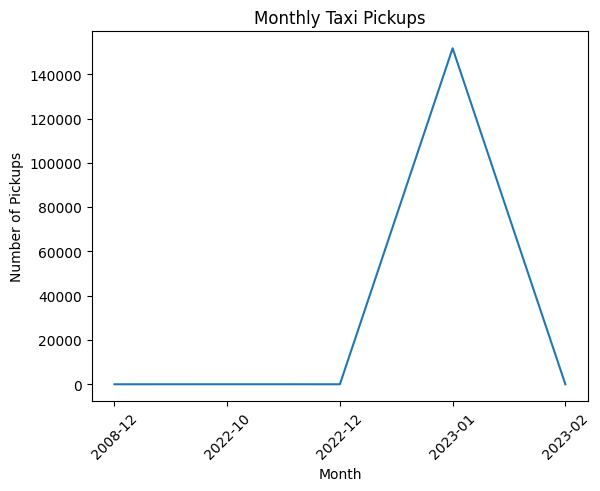

In [38]:
# Show the monthly trends in pickups
df_combined_sampled['pickup_month'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime']).dt.to_period('M')
monthly_counts = df_combined_sampled['pickup_month'].value_counts().sort_index()

print(monthly_counts)

sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values)
plt.xticks(rotation=45)
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()




##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?


fare_amount: zeros=63, negatives=0
count    151743.000000
mean         18.608840
std          17.363154
min           0.000000
25%           8.600000
50%          12.800000
75%          20.500000
max         999.000000
Name: fare_amount, dtype: float64


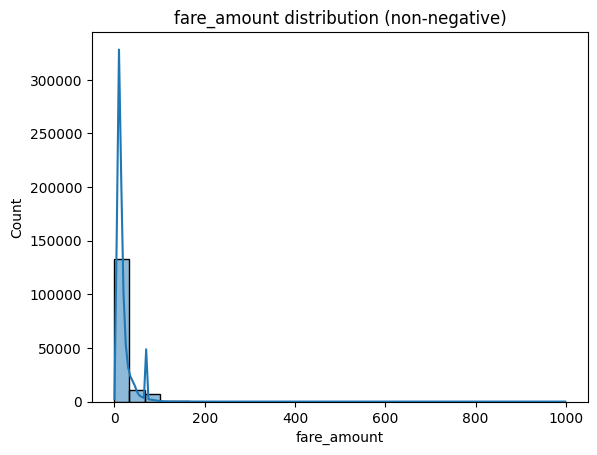


tip_amount: zeros=33567, negatives=0
count    151743.000000
mean          3.388971
std           3.847749
min           0.000000
25%           1.000000
50%           2.740000
75%           4.200000
max         202.000000
Name: tip_amount, dtype: float64


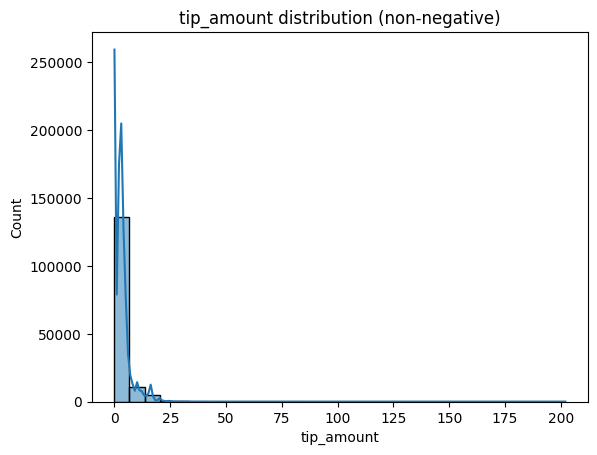


total_amount: zeros=36, negatives=7
count    151743.000000
mean         27.367311
std          21.581766
min          -5.250000
25%          15.480000
50%          20.160000
75%          28.820000
max        1000.000000
Name: total_amount, dtype: float64


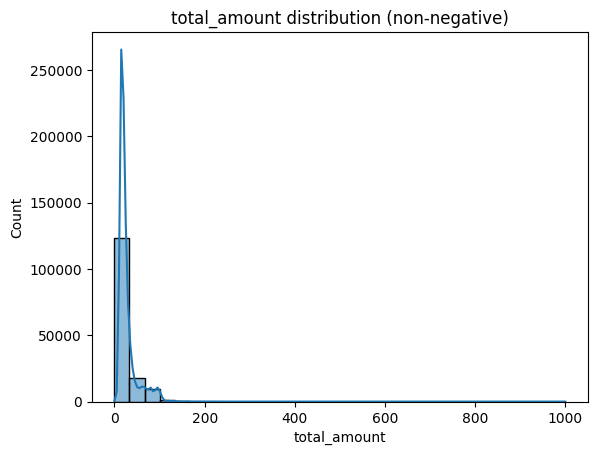


trip_distance: zeros=2261, negatives=0
count    151743.000000
mean          3.470976
std          28.953109
min           0.000000
25%           1.070000
50%           1.800000
75%           3.310000
max       10451.890000
Name: trip_distance, dtype: float64


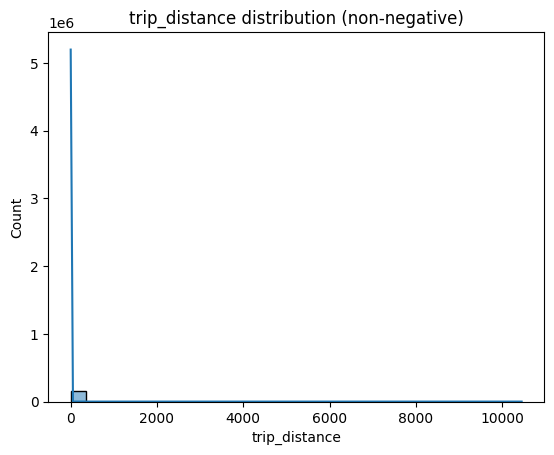

In [39]:
# Analyse the above parameters
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for c in cols:
    if c in df_combined_sampled:
        s = df_combined_sampled[c]
        print(f"\n{c}: zeros={sum(s==0)}, negatives={sum(s<0)}\n{ s.describe() }")
        sns.histplot(s[s>=0], bins=30, kde=True).set(title=f'{c} distribution (non-negative)')
        plt.show()
    else:
        print(f"{c} missing")




Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [40]:
# Create a df with non zero entries for the selected parameters.
cols = [ 'fare_amount','tip_amount', 'total_amount', 'trip_distance']
df_nonzero = df_combined_sampled[(df_combined_sampled[cols] != 0).all(axis=1)]
df_nonzero.info()



<class 'pandas.core.frame.DataFrame'>
Index: 117433 entries, 1 to 151742
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               117433 non-null  int64         
 1   tpep_pickup_datetime   117433 non-null  datetime64[us]
 2   tpep_dropoff_datetime  117433 non-null  datetime64[us]
 3   passenger_count        117433 non-null  float64       
 4   trip_distance          117433 non-null  float64       
 5   RatecodeID             117433 non-null  float64       
 6   store_and_fwd_flag     114352 non-null  object        
 7   PULocationID           117433 non-null  int64         
 8   DOLocationID           117433 non-null  int64         
 9   payment_type           117433 non-null  int64         
 10  fare_amount            117433 non-null  float64       
 11  extra                  117433 non-null  float64       
 12  mta_tax                117433 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

pickup_month
2008-12         80.55
2022-10        753.94
2022-12         88.74
2023-01    4151849.65
2023-02         24.97
Freq: M, Name: total_amount, dtype: float64


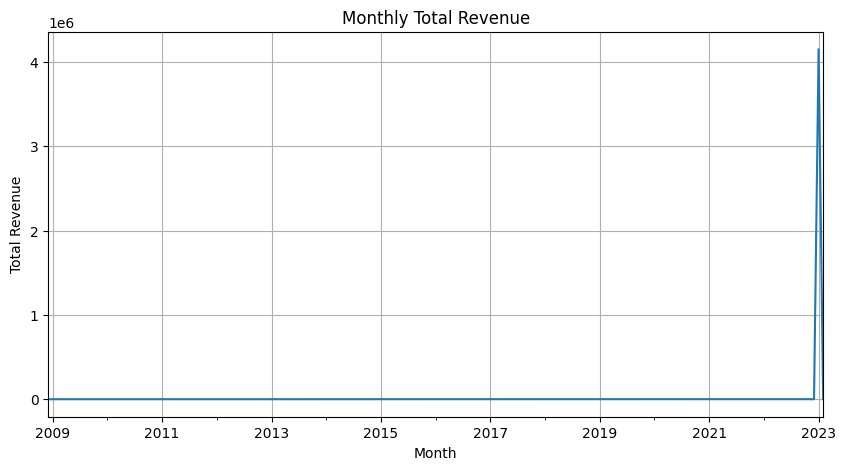

In [41]:
# Group data by month and analyse monthly revenue
df_combined_sampled['pickup_month'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime']).dt.to_period('M')
monthly_revenue = df_combined_sampled.groupby('pickup_month')['total_amount'].sum()
print(monthly_revenue)

monthly_revenue.plot(kind='line', figsize=(10,5), title='Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()




**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [42]:
# Calculate proportion of each quarter

# Ensure datetime column is datetime
df_combined_sampled['pickup_quarter'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime']).dt.to_period('Q')

# Sum total_amount per quarter
quarterly_revenue = df_combined_sampled.groupby('pickup_quarter')['total_amount'].sum()

# Calculate proportion of each quarter's revenue
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum()

print(quarterly_proportion)


pickup_quarter
2008Q4    0.000019
2022Q4    0.000203
2023Q1    0.999778
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

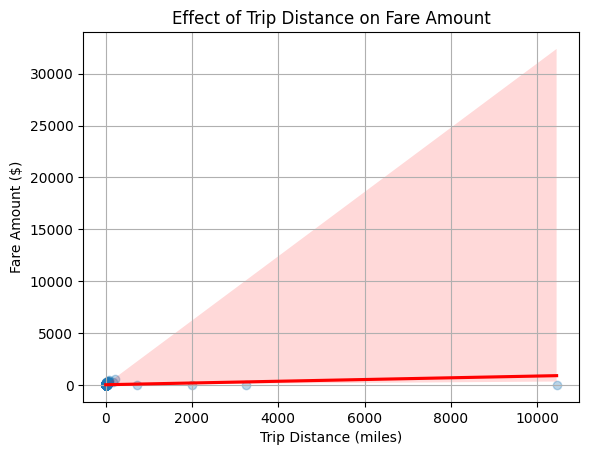

In [43]:
# Show how trip fare is affected by distance
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out zero or negative values for clarity
df_filtered = df_combined_sampled[(df_combined_sampled['trip_distance'] > 0) & (df_combined_sampled['fare_amount'] > 0)]

# Plot
sns.regplot(data=df_filtered, x='trip_distance', y='fare_amount', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Effect of Trip Distance on Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip duration and fare amount: 0.2285


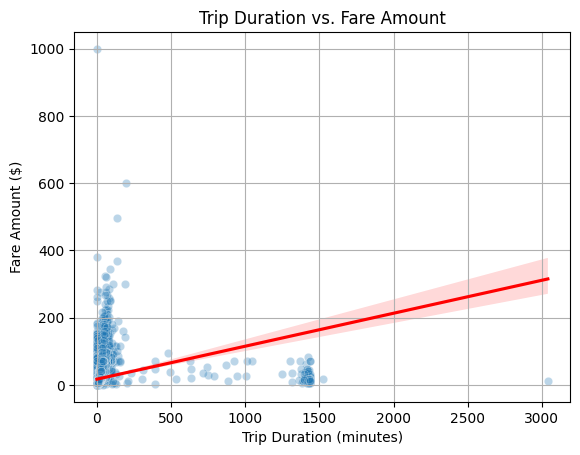

In [44]:
# Show relationship between fare and trip duration

# Ensure datetime columns are in datetime format
df = df_combined_sampled.copy()
df['pickup'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['dropoff'] - df['pickup']).dt.total_seconds() / 60

# Filter out invalid durations or fares
df_filtered = df[(df['trip_duration'] > 0) & (df['fare_amount'] > 0)]

# Correlation
corr = df_filtered['trip_duration'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip duration and fare amount: {corr:.4f}")

# Visualization
sns.scatterplot(data=df_filtered, x='trip_duration', y='fare_amount', alpha=0.3)
sns.regplot(data=df_filtered, x='trip_duration', y='fare_amount', scatter=False, color='red')
plt.title('Trip Duration vs. Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


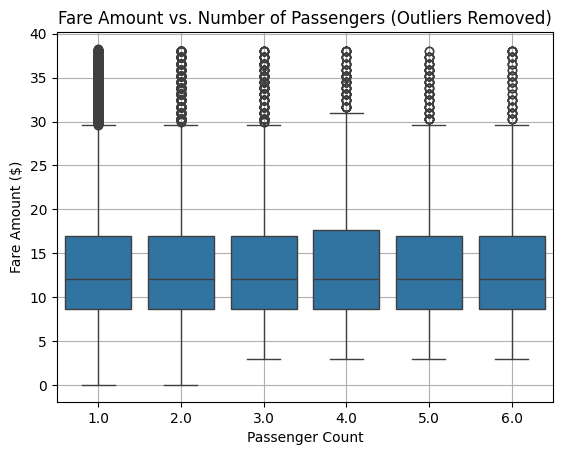

In [47]:
# Show relationship between fare and number of passengers
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for positive fare and reasonable passenger count
df_filtered = df_combined_sampled[
    (df_combined_sampled['fare_amount'] > 0) &
    (df_combined_sampled['passenger_count'].between(1, 6))
]

# Step 2: Remove outliers using IQR method
Q1 = df_filtered['fare_amount'].quantile(0.25)
Q3 = df_filtered['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered_no_outliers = df_filtered[
    (df_filtered['fare_amount'] >= lower_bound) &
    (df_filtered['fare_amount'] <= upper_bound)
]

# Step 3: Boxplot without outliers
sns.boxplot(data=df_filtered_no_outliers, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs. Number of Passengers (Outliers Removed)')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


Correlation between trip distance and tip amount: 0.1037


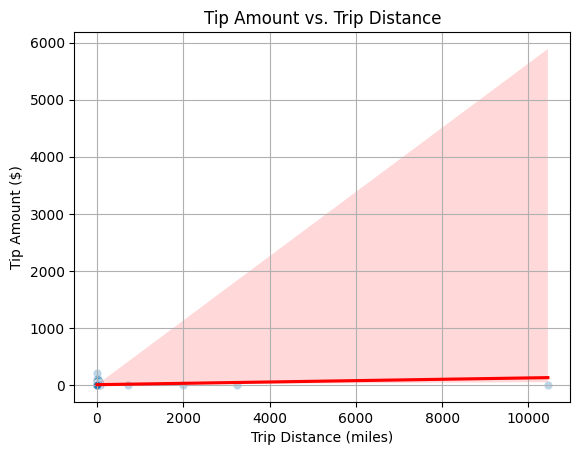

In [48]:
# Show relationship between tip and trip distance
# Filter out zero or negative values for clarity
df_filtered = df_combined_sampled[(df_combined_sampled['trip_distance'] > 0) &
                                  (df_combined_sampled['tip_amount'] > 0)]

# Correlation
corr = df_filtered['trip_distance'].corr(df_filtered['tip_amount'])
print(f"Correlation between trip distance and tip amount: {corr:.4f}")

# Plot
sns.scatterplot(data=df_filtered, x='trip_distance', y='tip_amount', alpha=0.3)
sns.regplot(data=df_filtered, x='trip_distance', y='tip_amount', scatter=False, color='red')
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
 payment_type
1    120203
2     26346
0      3598
4       889
3       707
Name: count, dtype: int64


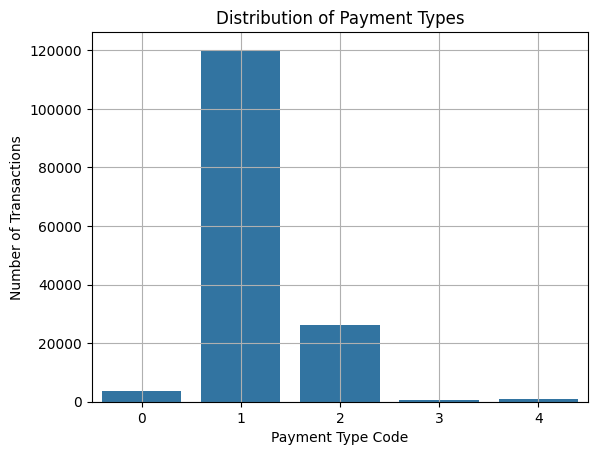

In [49]:
# Analyse the distribution of different payment types (payment_type).

# Value counts
payment_counts = df_combined_sampled['payment_type'].value_counts()
print("Payment Type Distribution:\n", payment_counts)

# Bar plot
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type Code')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [55]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [98]:
import geopandas as gpd
#import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file("/content/taxi_zones.shp")

# Display the GeoDataFrame
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

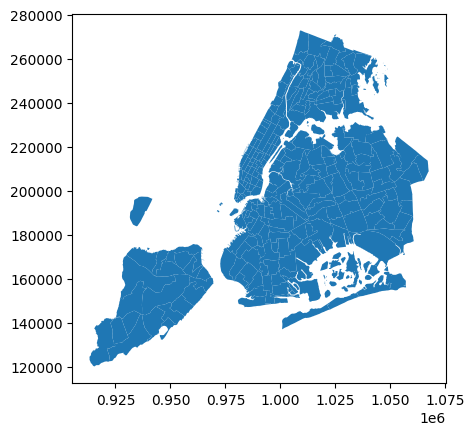

In [99]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [100]:
# Merge zones and trip records using locationID and PULocationID

# Rename 'LocationID' in zones to avoid confusion
zones = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge trip data with zone data on pickup location
# Change 'right_on' to 'PULocationID' because 'LocationID' was renamed in the 'zones' DataFrame
merged = df_combined_sampled.merge(zones, left_on='PULocationID', right_on='PULocationID', how='left')

# Show result
merged.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0               None            66           107   

   payment_type  ...  fare_per_mile_per_passenger  fare_per_mile  \
0             2  ...                     4.186047       4.186047   
1             1  ...                     3.185484       6.370968   
2             2  ...                     2.638889       7.916667   
3             2  ...                    12.037037      12.037037   
4             0  ...                     1.332640       1.332640   

   distance_tier    tip_pct  OBJECTID  Shape_Leng  Shape_Area  \
0           Long   0.000000     138.0    0.107467    0.000537   
1          Short  32.658228     161.0    0.035804    0.000072   
2          Short   0.000000     237.0    0.042213    0.000096   
3     Very Short   0.000000     143.0    0.054180    0.000151   
4      Very Long  23.127925      66.0    0.054633    0.000108   

                    zone    borough  \
0      LaGuardia Airport     Queens   
1         Midtown Center  Manhattan   
2  Upper East Side South  Manhattan   
3    Lincoln Square West  Manhattan   
4     DUMBO/Vinegar Hill   Brooklyn   

                                            geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((990055.507 196472.349, 990004.46 196...  

[5 rows x 43 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [101]:
# Group data by location and calculate the number of trips
trip_counts = df_combined_sampled.groupby('PULocationID').size().reset_index(name='trip_count')
print(trip_counts.head())



   PULocationID  trip_count
0             1           2
1             3           3
2             4         170
3             6           5
4             7          61


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [102]:
# Merge trip counts back to the zones GeoDataFrame


# Merge trip counts back to the zones GeoDataFrame

# Use the corrected column name for merging from the zones GeoDataFrame
zones_with_counts = zones.merge(trip_counts, left_on='PULocationID', right_on='PULocationID', how='left')

# Fill NaN trip counts with 0 (zones with no trips)
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0).astype(int)

zones_with_counts.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  PULocationID  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0           2  
1           0  
2           3  
3         170  
4           0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

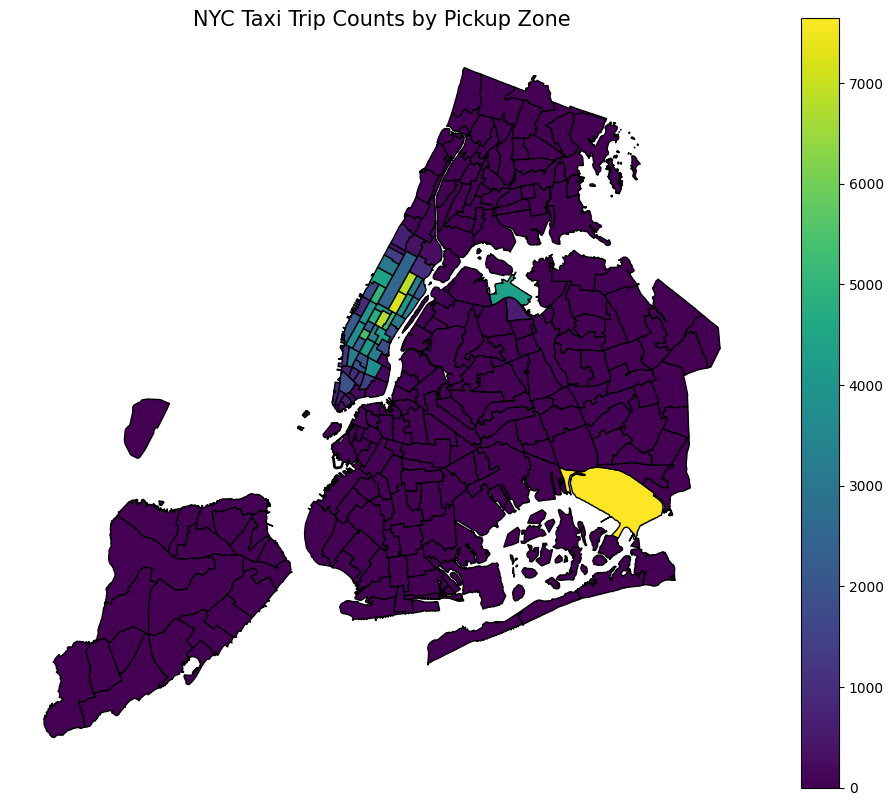

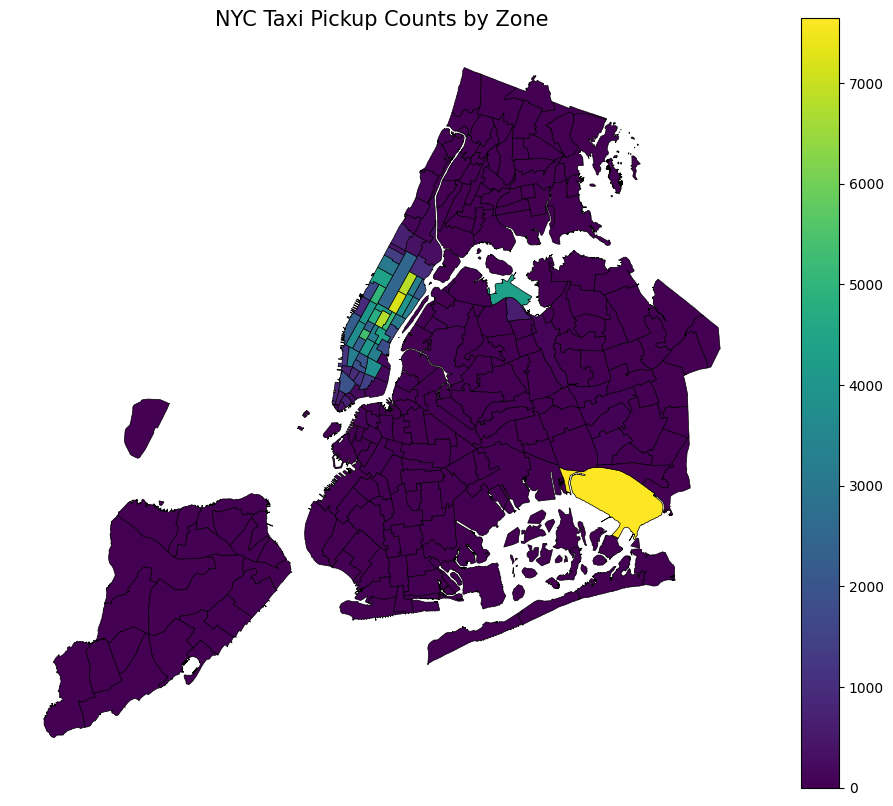

In [103]:
# Define figure and axis
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the zones, colored by trip count
zones_with_counts.plot(column='trip_count', ax=ax, legend=True,
                       cmap='viridis', edgecolor='black')

# Add title and remove axes
ax.set_title('NYC Taxi Trip Counts by Pickup Zone', fontsize=15)
ax.axis('off')

plt.show()



# Plot the map and display it
import matplotlib.pyplot as plt

# Plot trip counts per zone
fig, ax = plt.subplots(figsize=(12, 10))

zones_with_counts.plot(
    column='trip_count',       # Column to color by
    ax=ax,                     # Axis to plot on
    cmap='viridis',            # Color map
    legend=True,               # Show color legend
    edgecolor='black',         # Border color
    linewidth=0.5              # Border width
)

# Set title and turn off axis ticks
ax.set_title('NYC Taxi Pickup Counts by Zone', fontsize=15)
ax.axis('off')

# Show the plot
plt.show()




In [104]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones GeoDataFrame by trip count in descending order
sorted_zones = zones_with_counts.sort_values(by='trip_count', ascending=False)

# Display the top rows
print(sorted_zones[['zone', 'borough', 'trip_count']].head(10))


                             zone    borough  trip_count
131                   JFK Airport     Queens        7651
236         Upper East Side South  Manhattan        7217
235         Upper East Side North  Manhattan        6838
160                Midtown Center  Manhattan        6773
185  Penn Station/Madison Sq West  Manhattan        5343
161                  Midtown East  Manhattan        5191
141           Lincoln Square East  Manhattan        5010
229     Times Sq/Theatre District  Manhattan        4809
238         Upper West Side South  Manhattan        4352
169                   Murray Hill  Manhattan        4333


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [105]:
# Find routes which have the slowest speeds at different times of the day
# Step 1: Ensure datetime format
df_combined_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime'])
df_combined_sampled['tpep_dropoff_datetime'] = pd.to_datetime(df_combined_sampled['tpep_dropoff_datetime'])

# Step 2: Compute trip duration in hours
df_combined_sampled['trip_duration_hr'] = (
    (df_combined_sampled['tpep_dropoff_datetime'] - df_combined_sampled['tpep_pickup_datetime']).dt.total_seconds() / 3600
)

# Step 3: Compute speed in mph and filter valid speeds
df_combined_sampled['speed_mph'] = df_combined_sampled['trip_distance'] / df_combined_sampled['trip_duration_hr']
df_combined_sampled = df_combined_sampled[df_combined_sampled['speed_mph'].between(1, 100)]

# Step 4: Extract pickup hour
df_combined_sampled['hour'] = df_combined_sampled['tpep_pickup_datetime'].dt.hour

# Step 5: Group by hour and route, then get mean speed
grouped = df_combined_sampled.groupby(['hour', 'PULocationID', 'DOLocationID'])['speed_mph'].mean().reset_index()

# Step 6: Get slowest route per hour
slowest_routes_by_hour = grouped.sort_values(['hour', 'speed_mph']).groupby('hour').first().reset_index()
print(slowest_routes_by_hour.head(10))


   hour  PULocationID  DOLocationID  speed_mph
0     0           144           148   1.504823
1     1           211           197   1.837336
2     2           148           148   1.452426
3     3           237           236   3.886640
4     4           161           230   3.096774
5     5           264           138   1.161290
6     6           119           244   3.110228
7     7            80            17   2.710843
8     8           168           168   1.747573
9     9           129            82   1.997226


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

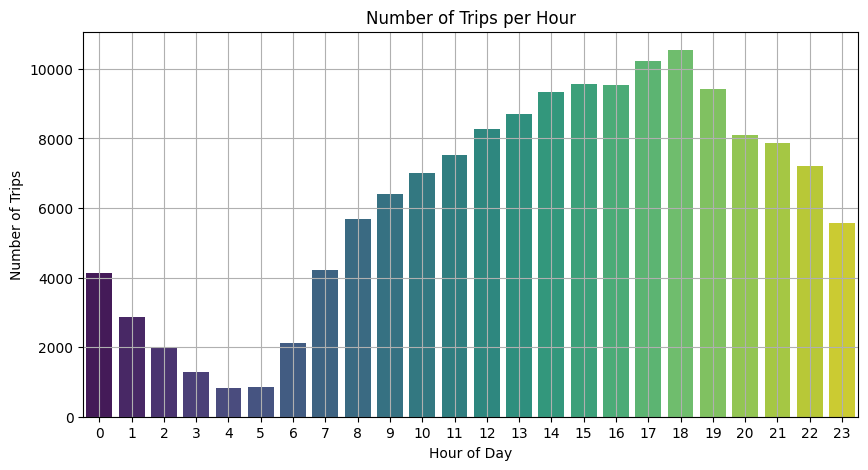


🚕 Busiest hour: 18:00 with 10541 trips


In [106]:
# Visualise the number of trips per hour and find the busiest hour

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format and extract hour
df_combined_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime'])
df_combined_sampled['hour'] = df_combined_sampled['tpep_pickup_datetime'].dt.hour

# Count trips per hour
hourly_counts = df_combined_sampled['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Find busiest hour
busiest_hour = hourly_counts.idxmax()
trip_count = hourly_counts.max()
print(f"\n🚕 Busiest hour: {busiest_hour}:00 with {trip_count} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [107]:
# Scale up the number of trips
# Count actual number of trips in the sample
sample_trip_count = len(df_combined_sampled)

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05 # Define the variable before using it

# Scale up
estimated_total_trips = sample_trip_count / sample_fraction

print(f"Sample trip count: {sample_trip_count}")
print(f"Estimated total trips (scaled): {estimated_total_trips:,.0f}")


Sample trip count: 149212
Estimated total trips (scaled): 2,984,240


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

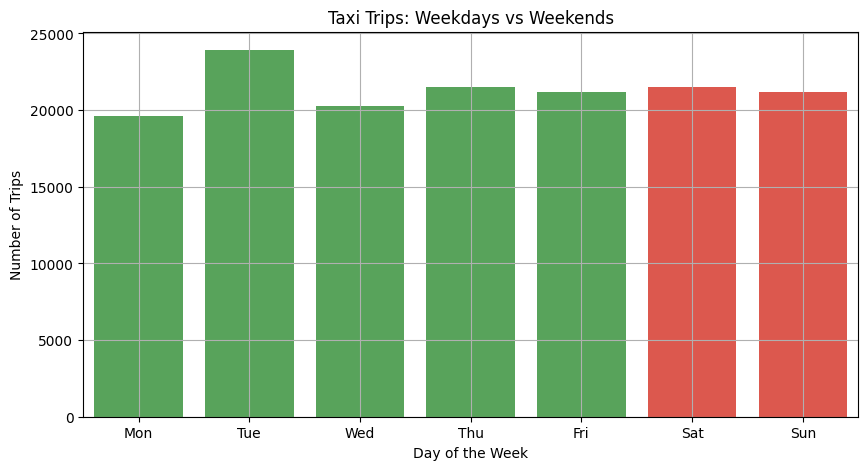


Weekday Trips: 106538
Weekend Trips: 42674


In [108]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
df_combined_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime'])

# Extract day of week (0=Monday, 6=Sunday) and label
df_combined_sampled['day_of_week'] = df_combined_sampled['tpep_pickup_datetime'].dt.dayofweek
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_combined_sampled['day_name'] = df_combined_sampled['day_of_week'].map(dict(enumerate(day_labels)))

# Classify into weekday vs weekend
df_combined_sampled['is_weekend'] = df_combined_sampled['day_of_week'] >= 5  # Sat (5), Sun (6)

# Count number of trips per day
daily_counts = df_combined_sampled['day_name'].value_counts().reindex(day_labels)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values,
            palette=['#4CAF50' if i < 5 else '#F44336' for i in range(7)])  # green = weekday, red = weekend
plt.title('Taxi Trips: Weekdays vs Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

# Print summary
print("\nWeekday Trips:", df_combined_sampled[~df_combined_sampled['is_weekend']].shape[0])
print("Weekend Trips:", df_combined_sampled[df_combined_sampled['is_weekend']].shape[0])



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [109]:
# Find top 10 pickup and dropoff zones

# Count top 10 pickup zones
top_pickups = df_combined_sampled['PULocationID'].value_counts().head(10)

# Count top 10 dropoff zones
top_dropoffs = df_combined_sampled['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Zones (LocationID and counts):")
print(top_pickups)

print("\nTop 10 Dropoff Zones (LocationID and counts):")
print(top_dropoffs)


Top 10 Pickup Zones (LocationID and counts):
PULocationID
132    7651
237    7217
236    6838
161    6773
186    5343
162    5191
142    5010
230    4809
239    4352
170    4333
Name: count, dtype: int64

Top 10 Dropoff Zones (LocationID and counts):
DOLocationID
236    7225
237    6572
161    5662
170    4403
142    4394
230    4383
239    4363
141    4315
162    4028
48     3661
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [110]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups and dropoffs per zone
pickup_counts = df_combined_sampled['PULocationID'].value_counts()
dropoff_counts = df_combined_sampled['DOLocationID'].value_counts()

# Combine into a DataFrame
zone_counts = pd.DataFrame({
    'pickups': pickup_counts,
    'dropoffs': dropoff_counts
}).fillna(0)  # Fill NaNs where a zone might be missing pickups or dropoffs

# Calculate pickup/dropoff ratio (handle division by zero)
zone_counts['pu_do_ratio'] = zone_counts['pickups'] / zone_counts['dropoffs'].replace(0, 1)

# Sort by ratio
sorted_ratios = zone_counts.sort_values('pu_do_ratio')

# Bottom 10 zones (lowest ratios)
bottom_10 = sorted_ratios.head(10)

# Top 10 zones (highest ratios)
top_10 = sorted_ratios.tail(10)

print("Bottom 10 Pickup/Dropoff Ratios:")
print(bottom_10[['pickups', 'dropoffs', 'pu_do_ratio']])

print("\nTop 10 Pickup/Dropoff Ratios:")
print(top_10[['pickups', 'dropoffs', 'pu_do_ratio']])



Bottom 10 Pickup/Dropoff Ratios:
     pickups  dropoffs  pu_do_ratio
5        0.0       2.0          0.0
8        0.0       6.0          0.0
11       0.0       9.0          0.0
30       0.0       1.0          0.0
27       0.0       1.0          0.0
58       0.0       5.0          0.0
59       0.0       3.0          0.0
46       0.0       3.0          0.0
57       0.0       4.0          0.0
109      0.0       1.0          0.0

Top 10 Pickup/Dropoff Ratios:
     pickups  dropoffs  pu_do_ratio
162   5191.0    4028.0     1.288729
249   3229.0    2392.0     1.349916
114   1924.0    1388.0     1.386167
43    2526.0    1785.0     1.415126
186   5343.0    3320.0     1.609337
6        5.0       3.0     1.666667
264   1923.0     971.0     1.980433
138   4327.0    1615.0     2.679257
132   7651.0    1430.0     5.350350
70     617.0      65.0     9.492308


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [111]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Convert pickup datetime to datetime if not already
df_combined_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime'])

# Extract the pickup hour
df_combined_sampled['pickup_hour'] = df_combined_sampled['tpep_pickup_datetime'].dt.hour

# Filter for night hours: 11 PM (23) to 5 AM (5)
night_hours = df_combined_sampled[(df_combined_sampled['pickup_hour'] >= 23) | (df_combined_sampled['pickup_hour'] <= 5)]

# Get top 10 pickup zones at night
top_night_pickups = night_hours['PULocationID'].value_counts().head(10)

# Get top 10 dropoff zones at night
top_night_dropoffs = night_hours['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Zones (Night hours):")
print(top_night_pickups)

print("\nTop 10 Dropoff Zones (Night hours):")
print(top_night_dropoffs)


Top 10 Pickup Zones (Night hours):
PULocationID
79     1430
132    1017
249     970
48      840
148     793
114     700
230     613
186     531
107     504
138     490
Name: count, dtype: int64

Top 10 Dropoff Zones (Night hours):
DOLocationID
79     686
48     587
170    500
107    458
141    451
263    447
68     436
249    387
229    370
239    367
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [112]:
# Filter for night hours (11 PM to 5 AM)

df_combined_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime'])
df_combined_sampled['pickup_hour'] = df_combined_sampled['tpep_pickup_datetime'].dt.hour

# Filter for night hours (23, 0, 1, 2, 3, 4, 5)
night_data = df_combined_sampled[(df_combined_sampled['pickup_hour'] >= 23) | (df_combined_sampled['pickup_hour'] <= 5)]


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [113]:
# Analyse the fare per mile per passenger for different passenger counts


# Calculate fare per mile per passenger (avoid division by zero)
df_combined_sampled['fare_per_mile_per_passenger'] = df_combined_sampled.apply(
    lambda row: row['fare_amount'] / (row['trip_distance'] * row['passenger_count'])
    if row['trip_distance'] > 0 and row['passenger_count'] > 0 else None, axis=1)

# Group by passenger_count and get summary stats
fare_stats = df_combined_sampled.groupby('passenger_count')['fare_per_mile_per_passenger'].describe()

print(fare_stats)


                    count      mean         std       min       25%       50%  \
passenger_count                                                                 
0.0                   0.0       NaN         NaN       NaN       NaN       NaN   
1.0              113265.0  9.887596  107.620046  0.000000  5.518519  6.866359   
2.0               22154.0  5.755372   76.358141  0.000000  2.677402  3.352941   
3.0                5200.0  2.758877   12.761188  0.801282  1.818831  2.258819   
4.0                2604.0  3.451301   45.533639  0.614035  1.347460  1.689189   
5.0                2098.0  1.549780    3.337844  0.633771  1.100944  1.357817   
6.0                1385.0  1.285800    1.395262  0.409500  0.952381  1.182033   
8.0                   1.0  0.580601         NaN  0.580601  0.580601  0.580601   

                      75%          max  
passenger_count                         
0.0                   NaN          NaN  
1.0              8.500000  8430.000000  
2.0              4.142857

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [114]:
# Compare the average fare per mile for different days and for different times of the day

# Ensure datetime column
df_combined_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime'])

# Extract day of week and hour
df_combined_sampled['day_of_week'] = df_combined_sampled['tpep_pickup_datetime'].dt.day_name()
df_combined_sampled['hour'] = df_combined_sampled['tpep_pickup_datetime'].dt.hour

# Calculate fare per mile safely (avoid zero distances)
df_combined_sampled['fare_per_mile'] = df_combined_sampled.apply(
    lambda r: r['fare_amount'] / r['trip_distance'] if r['trip_distance'] > 0 else None, axis=1)

# Average fare per mile by day of week
avg_fare_by_day = df_combined_sampled.groupby('day_of_week')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("Average Fare per Mile by Day of Week:")
print(avg_fare_by_day)

# Average fare per mile by hour of day
avg_fare_by_hour = df_combined_sampled.groupby('hour')['fare_per_mile'].mean().sort_index()

print("\nAverage Fare per Mile by Hour of Day:")
print(avg_fare_by_hour)


Average Fare per Mile by Day of Week:
day_of_week
Monday       10.001703
Tuesday      10.572525
Wednesday     9.599060
Thursday      9.892336
Friday        9.642948
Saturday      9.292833
Sunday       11.342833
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Hour of Day:
hour
0      6.706612
1     12.130970
2      9.134915
3     11.241550
4      6.856227
5     10.686332
6      6.803185
7      7.516340
8     10.950408
9     10.051696
10     9.819202
11     9.528024
12     9.843134
13    11.704744
14     9.916203
15    11.217461
16    13.990143
17     9.759629
18    10.008558
19    12.007986
20     8.333171
21     8.486132
22     8.614338
23     8.429395
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [115]:
# Compare fare per mile for different vendors
# Calculate fare per mile safely
df_combined_sampled['fare_per_mile'] = df_combined_sampled.apply(
    lambda r: r['fare_amount'] / r['trip_distance'] if r['trip_distance'] > 0 else None, axis=1)

# Group by vendor and calculate average fare per mile
avg_fare_per_mile_vendor = df_combined_sampled.groupby('VendorID')['fare_per_mile'].mean()

print("Average Fare per Mile by Vendor:")
print(avg_fare_per_mile_vendor)



Average Fare per Mile by Vendor:
VendorID
1     7.546727
2    11.003665
Name: fare_per_mile, dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [116]:
# Defining distance tiers
# Define bins and labels for distance tiers (in miles)
bins = [0, 1, 3, 7, 15, df_combined_sampled['trip_distance'].max()]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# Create a new column with distance tiers
df_combined_sampled['distance_tier'] = pd.cut(df_combined_sampled['trip_distance'], bins=bins, labels=labels, include_lowest=True)

# Check the distribution
print(df_combined_sampled['distance_tier'].value_counts().sort_index())



distance_tier
Very Short    32672
Short         74268
Medium        23751
Long          11230
Very Long      7291
Name: count, dtype: int64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [117]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage safely (avoid division by zero)
df_combined_sampled['tip_pct'] = df_combined_sampled.apply(
    lambda r: (r['tip_amount'] / r['fare_amount'])*100 if r['fare_amount'] > 0 else 0, axis=1)

# Create distance tiers (example)
bins = [0, 1, 3, 7, 15, df_combined_sampled['trip_distance'].max()]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
df_combined_sampled['distance_tier'] = pd.cut(df_combined_sampled['trip_distance'], bins=bins, labels=labels, include_lowest=True)

# Extract pickup hour
df_combined_sampled['pickup_hour'] = df_combined_sampled['tpep_pickup_datetime'].dt.hour

# Group by distance tier, passenger count, and pickup hour, then calculate average tip percentage
tip_analysis = df_combined_sampled.groupby(['distance_tier', 'passenger_count', 'pickup_hour'])['tip_pct'].mean().reset_index()

print(tip_analysis.head())



  distance_tier  passenger_count  pickup_hour    tip_pct
0    Very Short              0.0            0  28.435956
1    Very Short              0.0            1  30.815654
2    Very Short              0.0            2  12.015504
3    Very Short              0.0            3  18.534483
4    Very Short              0.0            4  11.756757


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [118]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Calculate tip percentage if not already done
df_combined_sampled['tip_pct'] = df_combined_sampled.apply(
    lambda r: (r['tip_amount'] / r['fare_amount'])*100 if r['fare_amount'] > 0 else 0, axis=1)

# Filter two groups
low_tips = df_combined_sampled[df_combined_sampled['tip_pct'] < 10]
high_tips = df_combined_sampled[df_combined_sampled['tip_pct'] > 25]

# Compare stats: mean fare, trip distance, passenger count, trip duration
compare_stats = {
    'Metric': ['Fare Amount', 'Trip Distance', 'Passenger Count', 'Trip Duration (mins)'],
    'Low Tip (<10%)': [
        low_tips['fare_amount'].mean(),
        low_tips['trip_distance'].mean(),
        low_tips['passenger_count'].mean(),
        (low_tips['trip_duration'] / 60).mean() if 'trip_duration' in low_tips.columns else None
    ],
    'High Tip (>25%)': [
        high_tips['fare_amount'].mean(),
        high_tips['trip_distance'].mean(),
        high_tips['passenger_count'].mean(),
        (high_tips['trip_duration'] / 60).mean() if 'trip_duration' in high_tips.columns else None
    ]
}

import pandas as pd
comparison_df = pd.DataFrame(compare_stats)
print(comparison_df)



                 Metric  Low Tip (<10%)  High Tip (>25%)
0           Fare Amount       20.360940        13.592637
1         Trip Distance        3.868589         2.230916
2       Passenger Count        1.392204         1.342950
3  Trip Duration (mins)             NaN              NaN


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [119]:
# See how passenger count varies across hours and days
# Ensure datetime column is in datetime format
df_combined_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_combined_sampled['tpep_pickup_datetime'])

# Extract hour and day of week
df_combined_sampled['hour'] = df_combined_sampled['tpep_pickup_datetime'].dt.hour
df_combined_sampled['day_of_week'] = df_combined_sampled['tpep_pickup_datetime'].dt.day_name()

# Group by day and hour, calculate average passenger count
passenger_trends = df_combined_sampled.groupby(['day_of_week', 'hour'])['passenger_count'].mean().reset_index()

# Order days of week for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_trends['day_of_week'] = pd.Categorical(passenger_trends['day_of_week'], categories=days_order, ordered=True)
passenger_trends = passenger_trends.sort_values(['day_of_week', 'hour'])

print(passenger_trends.head())




   day_of_week  hour  passenger_count
24      Monday     0         1.422741
25      Monday     1         1.304598
26      Monday     2         1.301075
27      Monday     3         1.594203
28      Monday     4         1.303030


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [120]:
# How does passenger count vary across zones

# Group by pickup location ID and calculate average passenger count
passenger_by_zone = df_combined_sampled.groupby('PULocationID')['passenger_count'].mean().reset_index()

# If you have zones GeoDataFrame with 'LocationID', merge for zone names
passenger_by_zone = passenger_by_zone.merge(zones[['PULocationID', 'zone']], left_on='PULocationID', right_on='PULocationID', how='left')

# Sort by average passenger count descending
passenger_by_zone = passenger_by_zone.sort_values('passenger_count', ascending=False)

print(passenger_by_zone[['zone', 'passenger_count']].head(10))


                        zone  passenger_count
27        Brooklyn Navy Yard         3.500000
112               Kensington         3.000000
3    Arrochar/Fort Wadsworth         1.800000
48                    Corona         1.777778
49                    Corona         1.777778
7               Battery Park         1.717949
85               Fort Greene         1.684211
50         Crotona Park East         1.666667
145   Mott Haven/Port Morris         1.625000
196         Sunset Park West         1.625000


In [121]:
# For a more detailed analysis, we can use the zones_with_counts GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate average passenger count per pickup zone
avg_passengers = df_combined_sampled.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zones_with_counts GeoDataFrame on LocationID and PULocationID
# Corrected variable name from zones_with_trips to zones_with_counts
zones_with_counts = zones_with_counts.merge(avg_passengers, left_on='PULocationID', right_on='PULocationID', how='left') # Using PULocationID for merging as it was the column used in zones_with_counts creation

# Rename the column for clarity
zones_with_counts.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Check the updated GeoDataFrame
print(zones_with_counts[['zone', 'avg_passenger_count']].head())


                      zone  avg_passenger_count
0           Newark Airport             1.000000
1              Jamaica Bay                  NaN
2  Allerton/Pelham Gardens             1.000000
3            Alphabet City             1.417647
4            Arden Heights                  NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [122]:
# How often is each surcharge applied?
# Count occurrences of each surcharge value
congestion_surcharge_counts = df_combined_sampled['congestion_surcharge'].value_counts().sort_index()

print("Congestion Surcharge application counts:")
print(congestion_surcharge_counts)



Congestion Surcharge application counts:
congestion_surcharge
-2.5         5
 0.0     13280
 2.5    135927
Name: count, dtype: int64


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

# Recommendations
By combining spatial-temporal demand analysis with operational data on speeds, fares, and passenger counts, you can:

Better predict where and when rides will be requested

Proactively position your fleet

Optimize routes to reduce costs and waiting times

Improve driver utilization and customer satisfaction

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

#Suggestions
Predict, position, and pivot using spatiotemporal data.

Blend historical trends with real-time analytics for the most responsive strategy.

This approach reduces wait times, improves driver earnings, and increases customer satisfaction.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
   condition	              Pricing Adjustment	                    Expected Outcome
Peak hours/zones	        +10-20% surge pricing	               Higher revenue when demand spikes
Low demand periods	      5-10% discount	                     Increase trip volumes
Short trips (<2 miles)	  Minimum fare applied	               Prevent losses on short trips
Long trips (>10 miles)	  Higher per-mile rate	               Cover higher operational cost
More passengers	          Incremental fare per passenger	     Cover extra service cost